In [1]:
# THIS SOURCE CODE IS SUPPLIED AS IS WITHOUT WAR
# RANTY OF ANY KIND	 AND ITS AUTHOR AND THE JOURNAL OF
# ARTIFICIAL INTELLIGENCE RESEARCH JAIR AND JAIRS PUB
#LISHERS AND DISTRIBUTORS	 DISCLAIM ANY AND ALL WARRANTIES	
# INCLUDING BUT NOT LIMITED TO ANY IMPLIED WARRANTIES
# OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE	 
# AND ANY WARRANTIES OR NON INFRINGEMENT THE USER
# ASSUMES ALL LIABILITY AND RESPONSIBILITY FOR USE OF THIS
# SOURCE CODE	 AND NEITHER THE AUTHOR NOR JAIR	 NOR JAIRS
# PUBLISHERS AND DISTRIBUTORS	 WILL BE LIABLE FOR DAM
# AGES OF ANY KIND RESULTING FROM ITS USE Without limiting
# the generality of the foregoing	 neither the author	 nor JAIR	 nor JAIR's 
# publishers and distributors	 warrant that the Source Code will be errorfree	
# will operate without interruption	 or will meet the needs of the user

import time
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
from joblib import Parallel, delayed




In [2]:
import matplotlib.pyplot as plt

In [3]:
import causal_discovery_class as cd


C:\Users\eserban\OneDrive - Ericsson\CausalRL\TIME_SERIES_FOCUS\TUTORIAL\baselines\scripts_python\python_packages\tigramite\tigramite\independence_tests\gpdc.py:27: UserWarning: [Errno 2] No such file or directory: 'C:\\Users\\eserban\\OneDrive - Ericsson\\CausalRL\\TIME_SERIES_FOCUS\\TUTORIAL\\baselines\\scripts_python\\python_packages\\tigramite\\tigramite\\independence_tests\\..\\..\\versions.py'
  warnings.warn(str(e))
C:\Users\eserban\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\eserban\OneDrive - Ericsson\CausalRL\TIME_SERIES_FOCUS\TUTORIAL\baselines\scripts_python\python_packages\tigramite\tigramite\independence_tests\gpdc_torch.py:33: UserWarning: [Errno 2] No such file or directory: 'C:\\Users\\eserban\\OneDrive - Ericsson\\CausalRL\\TIME_SERIES_FOCUS\\TUTORIAL\\bas

Could not import packages for CMIknn and GPDC estimation


In [4]:
import networkx as nx

from tools.graph_functions import print_graph, print_temporal_graph, tgraph_to_graph, string_nodes


In [5]:

def three_col_format_to_graphs(nodes, three_col_format):
    tgtrue = nx.DiGraph()
    tgtrue.add_nodes_from(nodes)
    for i in range(three_col_format.shape[0]):
        c = "V"+str(int(three_col_format[i, 0]))
        e = "V"+str(int(three_col_format[i, 1]))
        tgtrue.add_edges_from([(c, e)])
        tgtrue.edges[c, e]['time'] = [int(three_col_format[i, 2])]

    gtrue, ogtrue, sgtrue = tgraph_to_graph(tgtrue)
    return gtrue, ogtrue, sgtrue, tgtrue


def run_on_data(i, method, files_input_name, verbose):
    save_model = True
    file_input_name = files_input_name[i]
    data = pd.read_csv('./dataset/double_pendulum_data_ORIGINAL_NORMALIZED.csv', delimiter=',', index_col=False, header=0)
    
    data.columns.str.match("Unnamed")
    data = data.loc[:,~data.columns.str.match("Unnamed")]
    
    # Fill na with mean
    for i in data.columns:
        mean_value = data[i].mean()
        data[i].fillna(value=mean_value, inplace=True)
    
    nodes = string_nodes(data.columns)

    if verbose:
        print("############################## Run "+str(i)+" ##############################")
        print(file_input_name)
        print("d = " + str(data.shape[1]))
        print("T = " + str(data.shape[0]))

    #idx_ground_truth_file = file_input_name.split('timeseries')[1].split('.csv')[0]
    #file_ground_truth_name = "sim"+idx_ground_truth_file+"_gt_processed"
    three_col_format_ground_truth = np.loadtxt('./groundtruth/Gt.csv', 
                                               delimiter=',')
    gtrue, ogtrue, sgtrue, tgtrue = three_col_format_to_graphs(nodes, three_col_format_ground_truth)

    start = time.time()

    if method == "GrangerPW":
        model = cd.GrangerPW(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    elif method == "GrangerMV":
        model = cd.GrangerMV(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    elif method == "TCDF":
        model = cd.TCDF(nodes, epochs=1000,  kernel_size=4, dilation_coefficient=4, hidden_layers=1, learning_rate=0.01,
                    sig_level=0.05)
        model.infer_from_data(data)
    elif method == "PCMCICMIknn":
        model = cd.PCMCI(nodes, sig_level=0.05, nlags=5, cond_ind_test="CMIknn")
        model.infer_from_data(data)
    elif method == "PCMCIParCorr":
        model = cd.PCMCI(nodes, sig_level=0.05, nlags=5, cond_ind_test="ParCorr")
        model.infer_from_data(data)
    elif method == "oCSE":
        model = cd.OCSE(nodes, sig_level=0.05)
        model.infer_from_data(data)
    elif method == "PCTMI":
        model = cd.PCTMI(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    elif method == "NBCB_pw":
        model = cd.NBCB(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    elif method == "NBCB":
        model = cd.NBCB(nodes, sig_level=0.05, nlags=5, pairwise=False)
        model.infer_from_data(data)
    elif method == "tsFCI":
        model = cd.TsFCI(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    elif method == "FCITMI":
        model = cd.FCITMI(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    elif method == "VarLiNGAM":
        model = cd.VarLiNGAM(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    elif method == "TiMINO":
        model = cd.TiMINO(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    elif method == "tsKIKO":
        model = cd.TsKIKO(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    elif method == "Dynotears":
        model = cd.Dynotears(nodes, sig_level=0.05, nlags=5)
        model.infer_from_data(data)
    else:
        model = None
        print("Error: method not found")
        exit(0)

    end = time.time()

    if save_model:
        nx.write_gpickle(model.ghat, "./experiments/"+method+"_"+str(i))
        nx.write_gpickle(model.oghat, "./experiments/"+method+"_"+str(i))
        nx.write_gpickle(model.sghat, "./experiments/"+method+"_"+str(i))

    # evaluation self and other
    pres_a = model.evaluation(gtrue, evaluation_measure="precision_adjacent")
    rec_a = model.evaluation(gtrue, evaluation_measure="recall_adjacent")
    fscore_a = model.evaluation(gtrue, evaluation_measure="f1_adjacent")
    pres_o = model.evaluation(gtrue, evaluation_measure="precision_oriented")
    rec_o = model.evaluation(gtrue, evaluation_measure="recall_oriented")
    fscore_o = model.evaluation(gtrue, evaluation_measure="f1_oriented")
    # evaluation other
    o_pres_a = model.evaluation(ogtrue, evaluation_measure="other_precision_adjacent")
    o_rec_a = model.evaluation(ogtrue, evaluation_measure="other_recall_adjacent")
    o_fscore_a = model.evaluation(ogtrue, evaluation_measure="other_f1_adjacent")
    o_pres_o = model.evaluation(ogtrue, evaluation_measure="other_precision_oriented")
    o_rec_o = model.evaluation(ogtrue, evaluation_measure="other_recall_oriented")
    o_fscore_o = model.evaluation(ogtrue, evaluation_measure="other_f1_oriented")
    # evaluation self
    s_pres = model.evaluation(sgtrue, evaluation_measure="self_precision")
    s_rec = model.evaluation(sgtrue, evaluation_measure="self_recall")
    s_fscore = model.evaluation(sgtrue, evaluation_measure="self_f1")
    
    # Draw the temporal graph
    nx.draw_networkx(model.tghat, pos=nx.spring_layout(model.tghat))

    if verbose:
        print('True Graph Other')
        print_graph(gtrue)
        print('Inferred Graph Other')
        model.print_graph()

        print("precision adjacent: " + str(pres_a))
        print("recall adjacent: " + str(rec_a))
        print("f-score adjacent: " + str(fscore_a))
        print("precision oriented: " + str(pres_o))
        print("recall oriented: " + str(rec_o))
        print("f-score oriented: " + str(fscore_o))

        print("other precision adjacent: " + str(o_pres_a))
        print("other recall adjacent: " + str(o_rec_a))
        print("other f-score adjacent: " + str(o_fscore_a))
        print("other precision oriented: " + str(o_pres_o))
        print("other recall oriented: " + str(o_rec_o))
        print("other f-score oriented: " + str(o_fscore_o))

        print("self precision: " + str(s_pres))
        print("self recall self: " + str(s_rec))
        print("self f-score self: " + str(s_fscore))

    if not isinstance(model, cd.TemporalGraphicalModel):
        print("Computation time: " + str(end - start))
        return pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
               o_fscore_o, s_pres, s_rec, s_fscore, (end - start)
    else:
        if save_model:
            nx.write_gpickle(model.tghat, "./experiments/" + method + "_" + str(i))
        # evaluation temporal
        t_pres = model.temporal_evaluation(tgtrue, evaluation_measure="precision")
        t_rec = model.temporal_evaluation(tgtrue, evaluation_measure="recall")
        t_fscore = model.temporal_evaluation(tgtrue, evaluation_measure="f1")

        if verbose:
            print('True Temporal Graph')
            print_temporal_graph(tgtrue)
            print('Inferred Temporal Graph')
            model.print_temporal_graph()

            print("temporal precision: " + str(t_pres))
            print("temporal recall: " + str(t_rec))
            print("temporal f-score: " + str(t_fscore))

            print("Computation time: "+str(end-start))
        return pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
               o_fscore_o, s_pres, s_rec, s_fscore, (end - start), t_pres, t_rec, t_fscore



# Coding starts from here

# TCDF

3
Argument List: ['C:\\Users\\eserban\\anaconda3\\envs\\env38\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\eserban\\AppData\\Roaming\\jupyter\\runtime\\kernel-4593350a-993c-41e3-aa02-0e3aecef48c2.json']
############################## Run 7 ##############################
double_pendulum_data_ORIGINAL_NORMALIZED.csv
d = 8
T = 17567
b"Arguments: Namespace(cuda=False, data=['C:\\\\Users\\\\eserban\\\\OneDrive - Ericsson\\\\CausalRL\\\\TIME_SERIES_FOCUS\\\\TUTORIAL\\\\baselines\\\\scripts_python/args/data.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=1, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', path=['C:\\\\Users\\\\eserban\\\\OneDrive - Ericsson\\\\CausalRL\\\\TIME_SERIES_FOCUS\\\\TUTORIAL\\\\baselines\\\\scripts_python'], plot=False, seed=1111, significance=0.05)\r\n\r\n Dataset:  data.csv\r\n\r\n Analysis started for target:  V0\r\nEpoch:  1 [0%] \tLoss: 0.193137\r\nEpoch: 500 [50%] \tLoss: 0.000175\r\nEpoch: 1

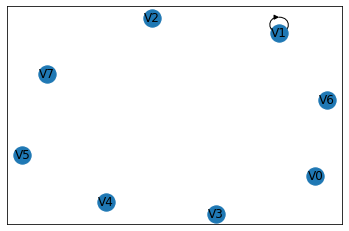

In [6]:

if __name__ == "__main__":
    import sys

    if len(sys.argv) > 2:
        print(len(sys.argv))
        method = "TCDF" #"TCDF" #sys.argv[1]  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        # WORKS: TCDF, PCMCIParCorr, PCTMI, 
        # DOESN NOT WORK: GrangerPW, GrangerMV, PCMCICMIknn, tsFCI, FCITMI, VarLiNGAM, TiMINO, Dynotears
        num_processor = 1 #int(sys.argv[2])  # -1 for all
        verbose = True #bool(int(sys.argv[3]))
        print('Argument List:', str(sys.argv))
    else:
        print('Missing arguments so will take default arguments')
        method = "Dynotears"  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        num_processor = 1
        verbose = True
        print('Default Argument List:', str(method), num_processor)

    path_input = './dataset/'
    files_input_name = [f for f in listdir(path_input) if isfile(join(path_input, f)) and not f.startswith('.')]
    results = Parallel(n_jobs=num_processor)(delayed(run_on_data)(i, method, files_input_name, verbose)
                                             for i in range(len(files_input_name)))

    results = np.array(results).reshape(len(files_input_name), -1)
    pres_a_list = results[:, 0]
    rec_a_list = results[:, 1]
    fscore_a_list = results[:, 2]
    pres_o_list = results[:, 3]
    rec_o_list = results[:, 4]
    fscore_o_list = results[:, 5]
    o_pres_a_list = results[:, 6]
    o_rec_a_list = results[:, 7]
    o_fscore_a_list = results[:, 8]
    o_pres_o_list = results[:, 9]
    o_rec_o_list = results[:, 10]
    o_fscore_o_list = results[:, 11]
    s_pres_list = results[:, 12]
    s_rec_list = results[:, 13]
    s_fscore_list = results[:, 14]
    comput_time_list = results[:, 15]

    # method = method+"window=1"
    # method = method+"window=auto"
    with open("./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Precision Adjacent: \n" + str(np.mean(pres_a_list)) + " +- " +
                   str(np.std(pres_a_list)))
        file.write("\n")
        file.write("Recall Adjacent: \n" + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        file.write("\n")
        file.write("F-Score Adjacent: \n" + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        file.write("\n")
        file.write("Precision Oriented: \n" + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        file.write("\n")
        file.write("Recall Oriented: \n" + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        file.write("\n")
        file.write("F-Score Oriented: \n" + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Other Precision Adjacent: \n" + str(np.mean(o_pres_a_list)) + " +- " +
                   str(np.std(o_pres_a_list)))
        file.write("\n")
        file.write("Other Recall Adjacent: \n" + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        file.write("\n")
        file.write("Other F-Score Adjacent: \n" + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        file.write("\n")
        file.write("Other Precision Oriented: \n" + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        file.write("\n")
        file.write("Other Recall Oriented: \n" + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        file.write("\n")
        file.write("Other F-Score Oriented: \n" + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum",
            "w+") as file:
        file.write("Self Precision: \n" + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        file.write("\n")
        file.write("Self Recall: \n" + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        file.write("\n")
        file.write("Self F-Score: \n" + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if verbose:
        print("####################### Final Result #######################")
        print("Precision Adjacent: " + str(np.mean(pres_a_list)) + " +- " + str(np.std(pres_a_list)))
        print("Recall Adjacent: " + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        print("F-Score Adjacent: " + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        print("Precision Oriented: " + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        print("Recall Oriented: " + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        print("F-Score Oriented: " + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        print("Other Precision Adjacent: " + str(np.mean(o_pres_a_list)) + " +- " + str(np.std(o_pres_a_list)))
        print("Other Recall Adjacent: " + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        print("Other F-Score Adjacent: " + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        print("Other Precision Oriented: " + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        print("Other Recall Oriented: " + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        print("Other F-Score Oriented: " + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        print("Self Precision: " + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        print("Self Recall: " + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        print("Self F-Score: " + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        print("Computational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if results.shape[1] > 16:
        t_pres_list = results[:, 16]
        t_rec_list = results[:, 17]
        t_fscore_list = results[:, 18]

        with open(
                "./experiments/" + str(method) + "_Pendulum",
                "w+") as file:
            file.write("Temporal Precision: \n" + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            file.write("\n")
            file.write("Temporal Recall: \n" + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            file.write("\n")
            file.write("Temporal F-Score: \n" + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
            file.write("\n")

            file.write(
                "\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))
        if verbose:
            print("Temporal Precision: " + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            print("Temporal Recall: " + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            print("Temporal F-Score: " + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time, t_pres, t_rec, t_fscore")
    else:
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time")



# PCMCI

3
Argument List: ['C:\\Users\\eserban\\anaconda3\\envs\\env38\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\eserban\\AppData\\Roaming\\jupyter\\runtime\\kernel-4593350a-993c-41e3-aa02-0e3aecef48c2.json']
############################## Run 7 ##############################
double_pendulum_data_ORIGINAL_NORMALIZED.csv
d = 8
T = 17567

##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable V0 has 7 parent(s):
        (V0 -1): max_pval = 0.00000, min_val =  1.000
        (V0 -4): max_pval = 0.00000, min_val =  0.999
        (V0 -5): max_pval = 0.00000, min_val = -0.164
        (V4 -4): max_pval = 0.00001, min_val =  0.034
        (V4 -2): max_pval = 0.00002, min_val =  0.033
        (V0 -3): max_pval = 0.00018, min_val = -0.028
        (V4 -1): max_pval = 0.00244, min_val =  0.023

    Variable 

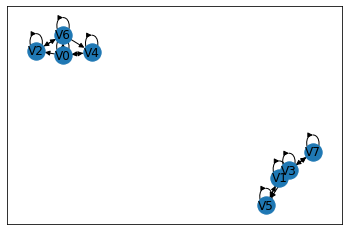

In [7]:

if __name__ == "__main__":
    import sys

    if len(sys.argv) > 2:
        print(len(sys.argv))
        method = "PCMCIParCorr" #"TCDF" #sys.argv[1]  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        # WORKS: TCDF, PCMCIParCorr, PCTMI, 
        # DOESN NOT WORK: GrangerPW, GrangerMV, PCMCICMIknn, tsFCI, FCITMI, VarLiNGAM, TiMINO, Dynotears
        num_processor = 1 #int(sys.argv[2])  # -1 for all
        verbose = True #bool(int(sys.argv[3]))
        print('Argument List:', str(sys.argv))
    else:
        print('Missing arguments so will take default arguments')
        method = "Dynotears"  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        num_processor = 1
        verbose = True
        print('Default Argument List:', str(method), num_processor)

    path_input = './dataset/'
    files_input_name = [f for f in listdir(path_input) if isfile(join(path_input, f)) and not f.startswith('.')]
    results = Parallel(n_jobs=num_processor)(delayed(run_on_data)(i, method, files_input_name, verbose)
                                             for i in range(len(files_input_name)))

    results = np.array(results).reshape(len(files_input_name), -1)
    pres_a_list = results[:, 0]
    rec_a_list = results[:, 1]
    fscore_a_list = results[:, 2]
    pres_o_list = results[:, 3]
    rec_o_list = results[:, 4]
    fscore_o_list = results[:, 5]
    o_pres_a_list = results[:, 6]
    o_rec_a_list = results[:, 7]
    o_fscore_a_list = results[:, 8]
    o_pres_o_list = results[:, 9]
    o_rec_o_list = results[:, 10]
    o_fscore_o_list = results[:, 11]
    s_pres_list = results[:, 12]
    s_rec_list = results[:, 13]
    s_fscore_list = results[:, 14]
    comput_time_list = results[:, 15]

    # method = method+"window=1"
    # method = method+"window=auto"
    with open("./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Precision Adjacent: \n" + str(np.mean(pres_a_list)) + " +- " +
                   str(np.std(pres_a_list)))
        file.write("\n")
        file.write("Recall Adjacent: \n" + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        file.write("\n")
        file.write("F-Score Adjacent: \n" + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        file.write("\n")
        file.write("Precision Oriented: \n" + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        file.write("\n")
        file.write("Recall Oriented: \n" + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        file.write("\n")
        file.write("F-Score Oriented: \n" + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Other Precision Adjacent: \n" + str(np.mean(o_pres_a_list)) + " +- " +
                   str(np.std(o_pres_a_list)))
        file.write("\n")
        file.write("Other Recall Adjacent: \n" + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        file.write("\n")
        file.write("Other F-Score Adjacent: \n" + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        file.write("\n")
        file.write("Other Precision Oriented: \n" + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        file.write("\n")
        file.write("Other Recall Oriented: \n" + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        file.write("\n")
        file.write("Other F-Score Oriented: \n" + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum",
            "w+") as file:
        file.write("Self Precision: \n" + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        file.write("\n")
        file.write("Self Recall: \n" + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        file.write("\n")
        file.write("Self F-Score: \n" + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if verbose:
        print("####################### Final Result #######################")
        print("Precision Adjacent: " + str(np.mean(pres_a_list)) + " +- " + str(np.std(pres_a_list)))
        print("Recall Adjacent: " + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        print("F-Score Adjacent: " + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        print("Precision Oriented: " + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        print("Recall Oriented: " + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        print("F-Score Oriented: " + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        print("Other Precision Adjacent: " + str(np.mean(o_pres_a_list)) + " +- " + str(np.std(o_pres_a_list)))
        print("Other Recall Adjacent: " + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        print("Other F-Score Adjacent: " + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        print("Other Precision Oriented: " + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        print("Other Recall Oriented: " + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        print("Other F-Score Oriented: " + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        print("Self Precision: " + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        print("Self Recall: " + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        print("Self F-Score: " + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        print("Computational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if results.shape[1] > 16:
        t_pres_list = results[:, 16]
        t_rec_list = results[:, 17]
        t_fscore_list = results[:, 18]

        with open(
                "./experiments/" + str(method) + "_Pendulum",
                "w+") as file:
            file.write("Temporal Precision: \n" + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            file.write("\n")
            file.write("Temporal Recall: \n" + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            file.write("\n")
            file.write("Temporal F-Score: \n" + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
            file.write("\n")

            file.write(
                "\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))
        if verbose:
            print("Temporal Precision: " + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            print("Temporal Recall: " + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            print("Temporal F-Score: " + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time, t_pres, t_rec, t_fscore")
    else:
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time")



# VarLINGAM

3
Argument List: ['C:\\Users\\eserban\\anaconda3\\envs\\env38\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\eserban\\AppData\\Roaming\\jupyter\\runtime\\kernel-4593350a-993c-41e3-aa02-0e3aecef48c2.json']
############################## Run 7 ##############################
double_pendulum_data_ORIGINAL_NORMALIZED.csv
d = 8
T = 17567


C:\Users\eserban\anaconda3\envs\env38\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\eserban\anaconda3\envs\env38\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\eserban\anaconda3\envs\env38\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\eserban\anaconda3\envs\env38\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
C:\Users\eserban\anaconda3\envs\env38\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' a

True Graph Other
(V0 -> V0)
(V1 -> V1)
(V2 -> V2)
(V3 -> V3)
(V4 -> V4)
(V5 -> V5)
(V6 -> V6)
(V7 -> V7)
Inferred Graph Other
(V0 -> V0)
(V1 -> V1)
(V2 -> V2)
(V3 -> V3)
(V4 -> V4)
(V5 -> V5)
(V6 -> V6)
(V7 -> V7)
precision adjacent: 1.0
recall adjacent: 1.0
f-score adjacent: 1.0
precision oriented: 1.0
recall oriented: 1.0
f-score oriented: 1.0
other precision adjacent: 0
other recall adjacent: 0
other f-score adjacent: 0
other precision oriented: 0
other recall oriented: 0
other f-score oriented: 0
self precision: 1.0
self recall self: 1.0
self f-score self: 1.0
True Temporal Graph
(V0 -> V0 with t= 1)
(V1 -> V1 with t= 1)
(V2 -> V2 with t= 1)
(V3 -> V3 with t= 1)
(V4 -> V4 with t= 1)
(V5 -> V5 with t= 1)
(V6 -> V6 with t= 1)
(V7 -> V7 with t= 1)
Inferred Temporal Graph
(V0 -> V0 with t= 1)
(V1 -> V1 with t= 1)
(V2 -> V2 with t= 1)
(V3 -> V3 with t= 1)
(V4 -> V4 with t= 1)
(V5 -> V5 with t= 1)
(V6 -> V6 with t= 1)
(V7 -> V7 with t= 1)
temporal precision: 1.0
temporal recall: 1.0
temp

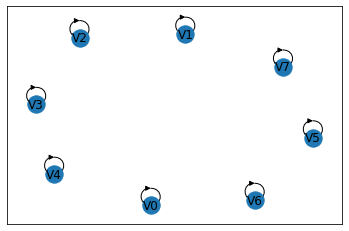

In [8]:

if __name__ == "__main__":
    import sys

    if len(sys.argv) > 2:
        print(len(sys.argv))
        method = "VarLiNGAM" #"TCDF" #sys.argv[1]  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        # WORKS: TCDF, PCMCIParCorr, PCTMI, 
        # DOESN NOT WORK: GrangerPW, GrangerMV, PCMCICMIknn, tsFCI, FCITMI, VarLiNGAM, TiMINO, Dynotears
        num_processor = 1 #int(sys.argv[2])  # -1 for all
        verbose = True #bool(int(sys.argv[3]))
        print('Argument List:', str(sys.argv))
    else:
        print('Missing arguments so will take default arguments')
        method = "Dynotears"  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        num_processor = 1
        verbose = True
        print('Default Argument List:', str(method), num_processor)

    path_input = './dataset/'
    files_input_name = [f for f in listdir(path_input) if isfile(join(path_input, f)) and not f.startswith('.')]
    results = Parallel(n_jobs=num_processor)(delayed(run_on_data)(i, method, files_input_name, verbose)
                                             for i in range(len(files_input_name)))

    results = np.array(results).reshape(len(files_input_name), -1)
    pres_a_list = results[:, 0]
    rec_a_list = results[:, 1]
    fscore_a_list = results[:, 2]
    pres_o_list = results[:, 3]
    rec_o_list = results[:, 4]
    fscore_o_list = results[:, 5]
    o_pres_a_list = results[:, 6]
    o_rec_a_list = results[:, 7]
    o_fscore_a_list = results[:, 8]
    o_pres_o_list = results[:, 9]
    o_rec_o_list = results[:, 10]
    o_fscore_o_list = results[:, 11]
    s_pres_list = results[:, 12]
    s_rec_list = results[:, 13]
    s_fscore_list = results[:, 14]
    comput_time_list = results[:, 15]

    # method = method+"window=1"
    # method = method+"window=auto"
    with open("./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Precision Adjacent: \n" + str(np.mean(pres_a_list)) + " +- " +
                   str(np.std(pres_a_list)))
        file.write("\n")
        file.write("Recall Adjacent: \n" + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        file.write("\n")
        file.write("F-Score Adjacent: \n" + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        file.write("\n")
        file.write("Precision Oriented: \n" + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        file.write("\n")
        file.write("Recall Oriented: \n" + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        file.write("\n")
        file.write("F-Score Oriented: \n" + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Other Precision Adjacent: \n" + str(np.mean(o_pres_a_list)) + " +- " +
                   str(np.std(o_pres_a_list)))
        file.write("\n")
        file.write("Other Recall Adjacent: \n" + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        file.write("\n")
        file.write("Other F-Score Adjacent: \n" + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        file.write("\n")
        file.write("Other Precision Oriented: \n" + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        file.write("\n")
        file.write("Other Recall Oriented: \n" + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        file.write("\n")
        file.write("Other F-Score Oriented: \n" + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum",
            "w+") as file:
        file.write("Self Precision: \n" + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        file.write("\n")
        file.write("Self Recall: \n" + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        file.write("\n")
        file.write("Self F-Score: \n" + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if verbose:
        print("####################### Final Result #######################")
        print("Precision Adjacent: " + str(np.mean(pres_a_list)) + " +- " + str(np.std(pres_a_list)))
        print("Recall Adjacent: " + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        print("F-Score Adjacent: " + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        print("Precision Oriented: " + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        print("Recall Oriented: " + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        print("F-Score Oriented: " + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        print("Other Precision Adjacent: " + str(np.mean(o_pres_a_list)) + " +- " + str(np.std(o_pres_a_list)))
        print("Other Recall Adjacent: " + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        print("Other F-Score Adjacent: " + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        print("Other Precision Oriented: " + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        print("Other Recall Oriented: " + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        print("Other F-Score Oriented: " + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        print("Self Precision: " + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        print("Self Recall: " + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        print("Self F-Score: " + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        print("Computational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if results.shape[1] > 16:
        t_pres_list = results[:, 16]
        t_rec_list = results[:, 17]
        t_fscore_list = results[:, 18]

        with open(
                "./experiments/" + str(method) + "_Pendulum",
                "w+") as file:
            file.write("Temporal Precision: \n" + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            file.write("\n")
            file.write("Temporal Recall: \n" + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            file.write("\n")
            file.write("Temporal F-Score: \n" + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
            file.write("\n")

            file.write(
                "\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))
        if verbose:
            print("Temporal Precision: " + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            print("Temporal Recall: " + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            print("Temporal F-Score: " + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time, t_pres, t_rec, t_fscore")
    else:
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time")



# DynoTEARS

3
Argument List: ['C:\\Users\\eserban\\anaconda3\\envs\\env38\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\eserban\\AppData\\Roaming\\jupyter\\runtime\\kernel-4593350a-993c-41e3-aa02-0e3aecef48c2.json']
############################## Run 7 ##############################
double_pendulum_data_ORIGINAL_NORMALIZED.csv
d = 8
T = 17567
True Graph Other
(V0 -> V0)
(V1 -> V1)
(V2 -> V2)
(V3 -> V3)
(V4 -> V4)
(V5 -> V5)
(V6 -> V6)
(V7 -> V7)
Inferred Graph Other
(V0 -> V0)
(V1 -> V1)
(V2 -> V2)
(V3 -> V1)
(V3 -> V3)
(V4 -> V4)
(V5 -> V1)
(V5 -> V5)
(V6 -> V6)
(V7 -> V7)
precision adjacent: 0.8
recall adjacent: 1.0
f-score adjacent: 0.888888888888889
precision oriented: 0.8
recall oriented: 1.0
f-score oriented: 0.888888888888889
other precision adjacent: 0
other recall adjacent: 0
other f-score adjacent: 0
other precision oriented: 0
other recall oriented: 0
other f-score oriented: 0
self precision: 1.0
self recall self: 1.0
self f-score self: 1.0
True Temporal Graph
(V0 -> V0

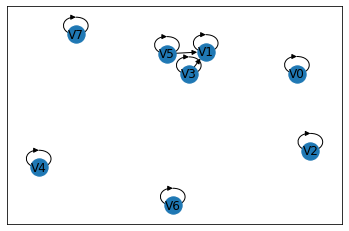

In [9]:

if __name__ == "__main__":
    import sys

    if len(sys.argv) > 2:
        print(len(sys.argv))
        method = "Dynotears" #"TCDF" #sys.argv[1]  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        # WORKS: TCDF, PCMCIParCorr, PCTMI, 
        # DOESN NOT WORK: GrangerPW, GrangerMV, PCMCICMIknn, tsFCI, FCITMI, VarLiNGAM, TiMINO, Dynotears
        num_processor = 1 #int(sys.argv[2])  # -1 for all
        verbose = True #bool(int(sys.argv[3]))
        print('Argument List:', str(sys.argv))
    else:
        print('Missing arguments so will take default arguments')
        method = "Dynotears"  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        num_processor = 1
        verbose = True
        print('Default Argument List:', str(method), num_processor)

    path_input = './dataset/'
    files_input_name = [f for f in listdir(path_input) if isfile(join(path_input, f)) and not f.startswith('.')]
    results = Parallel(n_jobs=num_processor)(delayed(run_on_data)(i, method, files_input_name, verbose)
                                             for i in range(len(files_input_name)))

    results = np.array(results).reshape(len(files_input_name), -1)
    pres_a_list = results[:, 0]
    rec_a_list = results[:, 1]
    fscore_a_list = results[:, 2]
    pres_o_list = results[:, 3]
    rec_o_list = results[:, 4]
    fscore_o_list = results[:, 5]
    o_pres_a_list = results[:, 6]
    o_rec_a_list = results[:, 7]
    o_fscore_a_list = results[:, 8]
    o_pres_o_list = results[:, 9]
    o_rec_o_list = results[:, 10]
    o_fscore_o_list = results[:, 11]
    s_pres_list = results[:, 12]
    s_rec_list = results[:, 13]
    s_fscore_list = results[:, 14]
    comput_time_list = results[:, 15]

    # method = method+"window=1"
    # method = method+"window=auto"
    with open("./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Precision Adjacent: \n" + str(np.mean(pres_a_list)) + " +- " +
                   str(np.std(pres_a_list)))
        file.write("\n")
        file.write("Recall Adjacent: \n" + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        file.write("\n")
        file.write("F-Score Adjacent: \n" + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        file.write("\n")
        file.write("Precision Oriented: \n" + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        file.write("\n")
        file.write("Recall Oriented: \n" + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        file.write("\n")
        file.write("F-Score Oriented: \n" + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Other Precision Adjacent: \n" + str(np.mean(o_pres_a_list)) + " +- " +
                   str(np.std(o_pres_a_list)))
        file.write("\n")
        file.write("Other Recall Adjacent: \n" + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        file.write("\n")
        file.write("Other F-Score Adjacent: \n" + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        file.write("\n")
        file.write("Other Precision Oriented: \n" + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        file.write("\n")
        file.write("Other Recall Oriented: \n" + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        file.write("\n")
        file.write("Other F-Score Oriented: \n" + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum",
            "w+") as file:
        file.write("Self Precision: \n" + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        file.write("\n")
        file.write("Self Recall: \n" + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        file.write("\n")
        file.write("Self F-Score: \n" + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if verbose:
        print("####################### Final Result #######################")
        print("Precision Adjacent: " + str(np.mean(pres_a_list)) + " +- " + str(np.std(pres_a_list)))
        print("Recall Adjacent: " + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        print("F-Score Adjacent: " + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        print("Precision Oriented: " + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        print("Recall Oriented: " + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        print("F-Score Oriented: " + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        print("Other Precision Adjacent: " + str(np.mean(o_pres_a_list)) + " +- " + str(np.std(o_pres_a_list)))
        print("Other Recall Adjacent: " + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        print("Other F-Score Adjacent: " + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        print("Other Precision Oriented: " + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        print("Other Recall Oriented: " + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        print("Other F-Score Oriented: " + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        print("Self Precision: " + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        print("Self Recall: " + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        print("Self F-Score: " + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        print("Computational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if results.shape[1] > 16:
        t_pres_list = results[:, 16]
        t_rec_list = results[:, 17]
        t_fscore_list = results[:, 18]

        with open(
                "./experiments/" + str(method) + "_Pendulum",
                "w+") as file:
            file.write("Temporal Precision: \n" + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            file.write("\n")
            file.write("Temporal Recall: \n" + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            file.write("\n")
            file.write("Temporal F-Score: \n" + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
            file.write("\n")

            file.write(
                "\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))
        if verbose:
            print("Temporal Precision: " + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            print("Temporal Recall: " + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            print("Temporal F-Score: " + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time, t_pres, t_rec, t_fscore")
    else:
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time")



# tsFCI

3
Argument List: ['C:\\Users\\eserban\\anaconda3\\envs\\env38\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\eserban\\AppData\\Roaming\\jupyter\\runtime\\kernel-4593350a-993c-41e3-aa02-0e3aecef48c2.json']
############################## Run 7 ##############################
double_pendulum_data_ORIGINAL_NORMALIZED.csv
d = 8
T = 17567
b'[1] "C:\\\\Users\\\\eserban\\\\OneDrive - Ericsson\\\\CausalRL\\\\TIME_SERIES_FOCUS\\\\TUTORIAL\\\\baselines\\\\scripts_R"\r\n[1] "#######################"\r\n[1] "Write data to file."\r\nNumber of samples: 17563 \r\n[1] "Write knowledge to file."\r\n[1] "Call Tetrad."\r\nLoading data from ./data.txt.\r\nData type = continuous.\r\n# variables = 40, # cases = 17563\r\n/knowledge\naddtemporal\n1 X01 X02 X03 X04 X05 X06 X07 X08 \n2 X09 X10 X11 X12 X13 X14 X15 X16 \n3 X17 X18 X19 X20 X21 X22 X23 X24 \n4 X25 X26 X27 X28 X29 X30 X31 X32 \n5 X33 X34 X35 X36 X37 X38 X39 X40 \n\nforbiddirect\n\nrequiredirect\r\nremove edge between X10 and X09 becaus

other f-score adjacent: 0
other precision oriented: 0
other recall oriented: 0
other f-score oriented: 0
self precision: 1.0
self recall self: 1.0
self f-score self: 1.0
True Temporal Graph
(V0 -> V0 with t= 1)
(V1 -> V1 with t= 1)
(V2 -> V2 with t= 1)
(V3 -> V3 with t= 1)
(V4 -> V4 with t= 1)
(V5 -> V5 with t= 1)
(V6 -> V6 with t= 1)
(V7 -> V7 with t= 1)
Inferred Temporal Graph
(V0 -> V0 with t= 1)
(V0 -> V0 with t= 3)
(V0 -> V0 with t= 4)
(V0 -> V2 with t= 0)
(V0 -> V4 with t= -2)
(V0 -> V4 with t= 4)
(V0 -> V5 with t= 0)
(V0 -> V6 with t= 0)
(V0 -> V6 with t= -1)
(V0 -> V6 with t= 1)
(V0 -> V6 with t= 4)
(V0 -> V7 with t= 0)
(V1 -> V1 with t= 1)
(V1 -> V1 with t= 3)
(V1 -> V3 with t= 0)
(V1 -> V4 with t= 0)
(V1 -> V5 with t= -2)
(V1 -> V5 with t= 3)
(V1 -> V5 with t= 4)
(V1 -> V6 with t= 0)
(V1 -> V7 with t= 0)
(V1 -> V7 with t= -1)
(V1 -> V7 with t= -3)
(V2 -> V0 with t= 0)
(V2 -> V0 with t= 1)
(V2 -> V0 with t= 2)
(V2 -> V2 with t= -3)
(V2 -> V2 with t= -4)
(V2 -> V2 with t= 1)
(V

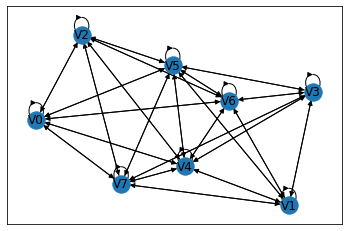

In [10]:

if __name__ == "__main__":
    import sys

    if len(sys.argv) > 2:
        print(len(sys.argv))
        method = "tsFCI" #"TCDF" #sys.argv[1]  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        # WORKS: TCDF, PCMCIParCorr, PCTMI, 
        # DOESN NOT WORK: GrangerPW, GrangerMV, PCMCICMIknn, tsFCI, FCITMI, VarLiNGAM, TiMINO, Dynotears
        num_processor = 1 #int(sys.argv[2])  # -1 for all
        verbose = True #bool(int(sys.argv[3]))
        print('Argument List:', str(sys.argv))
    else:
        print('Missing arguments so will take default arguments')
        method = "Dynotears"  # GrangerPW, GrangerMV, TCDF, PCMCICMIknn, PCMCIParCorr, PCTMI, tsFCI, FCITMI VarLiNGAM, TiMINO
        num_processor = 1
        verbose = True
        print('Default Argument List:', str(method), num_processor)

    path_input = './dataset/'
    files_input_name = [f for f in listdir(path_input) if isfile(join(path_input, f)) and not f.startswith('.')]
    results = Parallel(n_jobs=num_processor)(delayed(run_on_data)(i, method, files_input_name, verbose)
                                             for i in range(len(files_input_name)))

    results = np.array(results).reshape(len(files_input_name), -1)
    pres_a_list = results[:, 0]
    rec_a_list = results[:, 1]
    fscore_a_list = results[:, 2]
    pres_o_list = results[:, 3]
    rec_o_list = results[:, 4]
    fscore_o_list = results[:, 5]
    o_pres_a_list = results[:, 6]
    o_rec_a_list = results[:, 7]
    o_fscore_a_list = results[:, 8]
    o_pres_o_list = results[:, 9]
    o_rec_o_list = results[:, 10]
    o_fscore_o_list = results[:, 11]
    s_pres_list = results[:, 12]
    s_rec_list = results[:, 13]
    s_fscore_list = results[:, 14]
    comput_time_list = results[:, 15]

    # method = method+"window=1"
    # method = method+"window=auto"
    with open("./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Precision Adjacent: \n" + str(np.mean(pres_a_list)) + " +- " +
                   str(np.std(pres_a_list)))
        file.write("\n")
        file.write("Recall Adjacent: \n" + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        file.write("\n")
        file.write("F-Score Adjacent: \n" + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        file.write("\n")
        file.write("Precision Oriented: \n" + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        file.write("\n")
        file.write("Recall Oriented: \n" + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        file.write("\n")
        file.write("F-Score Oriented: \n" + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum", "w+") as file:
        file.write("Other Precision Adjacent: \n" + str(np.mean(o_pres_a_list)) + " +- " +
                   str(np.std(o_pres_a_list)))
        file.write("\n")
        file.write("Other Recall Adjacent: \n" + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        file.write("\n")
        file.write("Other F-Score Adjacent: \n" + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        file.write("\n")
        file.write("Other Precision Oriented: \n" + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        file.write("\n")
        file.write("Other Recall Oriented: \n" + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        file.write("\n")
        file.write("Other F-Score Oriented: \n" + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    with open(
            "./experiments/" + str(method) + "_Pendulum",
            "w+") as file:
        file.write("Self Precision: \n" + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        file.write("\n")
        file.write("Self Recall: \n" + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        file.write("\n")
        file.write("Self F-Score: \n" + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        file.write("\n")

        file.write("\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if verbose:
        print("####################### Final Result #######################")
        print("Precision Adjacent: " + str(np.mean(pres_a_list)) + " +- " + str(np.std(pres_a_list)))
        print("Recall Adjacent: " + str(np.mean(rec_a_list)) + " +- " + str(np.std(rec_a_list)))
        print("F-Score Adjacent: " + str(np.mean(fscore_a_list)) + " +- " + str(np.std(fscore_a_list)))
        print("Precision Oriented: " + str(np.mean(pres_o_list)) + " +- " + str(np.std(pres_o_list)))
        print("Recall Oriented: " + str(np.mean(rec_o_list)) + " +- " + str(np.std(rec_o_list)))
        print("F-Score Oriented: " + str(np.mean(fscore_o_list)) + " +- " + str(np.std(fscore_o_list)))
        print("Other Precision Adjacent: " + str(np.mean(o_pres_a_list)) + " +- " + str(np.std(o_pres_a_list)))
        print("Other Recall Adjacent: " + str(np.mean(o_rec_a_list)) + " +- " + str(np.std(o_rec_a_list)))
        print("Other F-Score Adjacent: " + str(np.mean(o_fscore_a_list)) + " +- " + str(np.std(o_fscore_a_list)))
        print("Other Precision Oriented: " + str(np.mean(o_pres_o_list)) + " +- " + str(np.std(o_pres_o_list)))
        print("Other Recall Oriented: " + str(np.mean(o_rec_o_list)) + " +- " + str(np.std(o_rec_o_list)))
        print("Other F-Score Oriented: " + str(np.mean(o_fscore_o_list)) + " +- " + str(np.std(o_fscore_o_list)))
        print("Self Precision: " + str(np.mean(s_pres_list)) + " +- " + str(np.std(s_pres_list)))
        print("Self Recall: " + str(np.mean(s_rec_list)) + " +- " + str(np.std(s_rec_list)))
        print("Self F-Score: " + str(np.mean(s_fscore_list)) + " +- " + str(np.std(s_fscore_list)))
        print("Computational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))

    if results.shape[1] > 16:
        t_pres_list = results[:, 16]
        t_rec_list = results[:, 17]
        t_fscore_list = results[:, 18]

        with open(
                "./experiments/" + str(method) + "_Pendulum",
                "w+") as file:
            file.write("Temporal Precision: \n" + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            file.write("\n")
            file.write("Temporal Recall: \n" + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            file.write("\n")
            file.write("Temporal F-Score: \n" + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
            file.write("\n")

            file.write(
                "\n\nComputational Time: " + str(np.mean(comput_time_list)) + " +- " + str(np.std(comput_time_list)))
        if verbose:
            print("Temporal Precision: " + str(np.mean(t_pres_list)) + " +- " + str(np.std(t_pres_list)))
            print("Temporal Recall: " + str(np.mean(t_rec_list)) + " +- " + str(np.std(t_rec_list)))
            print("Temporal F-Score: " + str(np.mean(t_fscore_list)) + " +- " + str(np.std(t_fscore_list)))
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time, t_pres, t_rec, t_fscore")
    else:
        np.savetxt("./experiments/" + str(method) + "_Pendulum.csv", results,
                   delimiter=';', header="pres_a, rec_a, fscore_a, pres_o, rec_o, fscore_o, o_pres_a, o_rec_a, o_fscore_a, o_pres_o, o_rec_o, \
                   o_fscore_o, s_pres, s_rec, s_fscore, computational_time")



# Backup

In [2]:
import networkx as nx

#from tools.graph_functions import print_graph, print_temporal_graph, tgraph_to_graph, string_nodes

G = nx.path_graph(4)
nx.write_gpickle(G, "test.gpickle")

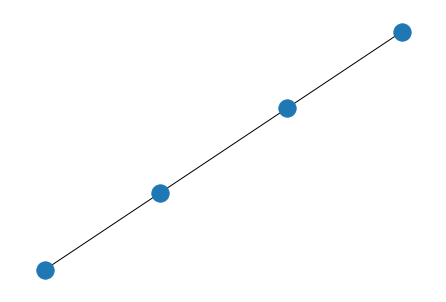

In [4]:
nx.draw(G)